### # Visualizando dados do SUS

### Para esse começo do bootcamp, vamos analisar os dados da saúde disponíveis em:
http://tabnet.datasus.gov.br/cgi/tabcgi.exe?sih/cnv/qiuf.def

Notebook referente às anotações e desafios da aula 3 do bootcamp

Em que aplicamos: linha=Unidade da federação, Coluna= Ano/mês atendimento, Conteúdo= Valor total, Períodos: Todos disponíveis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

In [2]:
url_dados = 'https://github.com/silvio-sjsj/bootcamp2_Alura_2021/blob/main/modulo1/A165942189_28_143_208.csv?raw=True'

In [4]:
dados = pd.read_csv(url_dados,
                    encoding="ISO-8859-1",
                    skiprows=3, sep=";", skipfooter=12, engine="python",
                    thousands=".", decimal=",")

In [5]:
colunas_usaveis = dados.mean().index.tolist() #index é uma série imutável, então vamos transformar numa lista de python
colunas_usaveis.insert(0, 'Unidade da Federação') #para que possamos inserir a coluna unidade da federação na posição 0
colunas_usaveis

usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop('Total', axis=1)
usaveis['total acumulado'] = usaveis.sum(axis=1)
indices = usaveis.index

região = []

for i in indices:    
    if i[0] == '1':
        região.append('Norte')
    if i[0] == '2':    
        região.append('Nordeste')
    if i[0] == '3':        
        região.append('Sudeste')
    if i[0] == '4':    
        região.append('Sul')
    if i[0] == '5':
        região.append('Centro-Oeste')

usaveis['Região'] = região

col_name="Região"
first_col = usaveis.pop(col_name)
usaveis.insert(0, col_name, first_col)
usaveis.head()

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,total acumulado
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,Norte,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,...,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,9.964107e+08
12 Acre,Norte,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,...,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,4.500472e+08
13 Amazonas,Norte,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,...,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1.917245e+09
14 Roraima,Norte,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,...,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31,3.288766e+08
15 Pará,Norte,181159.29,433414.74,1893197.50,5105406.44,13162823.43,21762104.16,20126081.01,22149375.82,23436682.75,...,40496349.97,38793393.54,36965951.76,38406616.21,37043032.10,36914437.92,33887773.65,23343222.94,13069564.31,4.705290e+09


Vamos ordenar o dataframe pelo total acumulado de forma que possamos saber os estados que mais gastaram e os estados que menos gastaram:

In [53]:
usaveis = usaveis.sort_values('total acumulado', ascending=False)
usaveis_ordenado = usaveis.drop('total acumulado', axis=1)
usaveis_ordenado = usaveis_ordenado.drop('Região', axis=1)
usaveis_ordenado.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.038067e+09,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,...,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.062081e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.679936e+07,1.085365e+08,1.117623e+08,1.101079e+08,1.138868e+08,1.167383e+08,1.168340e+08,1.023176e+08,8.440464e+07,3.779883e+07
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.515120e+08,4.412816e+07,4.290085e+07,4.530650e+07,4.395135e+07,...,8.813569e+07,9.594114e+07,8.979547e+07,8.188669e+07,8.057024e+07,8.280731e+07,9.056735e+07,8.720191e+07,6.087310e+07,4.914988e+07


In [62]:
usaveis_ordenado.tail()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,...,7871556.55,7934629.02,6488927.84,4229376.60,1853045.23,509009.74,689383.43,347626.85,416534.32,928756.84
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,...,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,...,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,...,3300012.98,3192075.41,3262354.34,2978629.22,3313296.78,3527263.23,3125021.90,3209323.68,3044798.77,2381844.31
16 Amapá,33672.74,104822.98,118378.28,226661.18,844019.90,1329876.61,1275063.72,1177745.93,1396371.51,1411520.77,...,2735248.12,2536642.73,2702550.32,2533445.46,2762003.36,2714710.93,2826612.42,2513766.36,1534733.18,989155.40


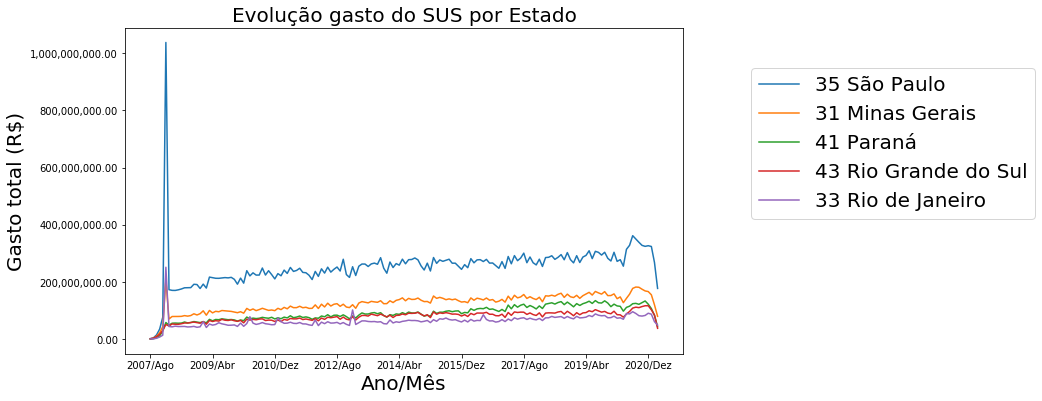

In [54]:
ax = usaveis_ordenado.head(5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

##### Vamos adicionar um novo estado aos cinco primeiros para que possamos fazer uma comparação entre este sexto estado e os cinco primeiros da lista:

In [55]:
estado_aleatorio = usaveis_ordenado.sample(n=1)
estado_aleatorio

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
51 Mato Grosso,63562.5,232444.62,927219.59,1740439.6,5394225.43,8213438.64,7929894.93,9416367.68,9390588.03,9378197.25,...,18546814.06,20681571.71,20936140.39,20176196.43,20387936.4,18316623.02,18852854.81,15890528.31,13207979.82,8835890.09


In [56]:
seis_estados = usaveis_ordenado.head(5).append(estado_aleatorio)
seis_estados

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,...,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.038067e+09,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,...,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.062081e+08,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,...,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,5.808133e+07,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,...,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,5.106461e+07,4.589770e+07,5.292870e+07,5.197242e+07,5.167935e+07,...,9.679936e+07,1.085365e+08,1.117623e+08,1.101079e+08,1.138868e+08,1.167383e+08,1.168340e+08,1.023176e+08,8.440464e+07,3.779883e+07
33 Rio de Janeiro,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.515120e+08,4.412816e+07,4.290085e+07,4.530650e+07,4.395135e+07,...,8.813569e+07,9.594114e+07,8.979547e+07,8.188669e+07,8.057024e+07,8.280731e+07,9.056735e+07,8.720191e+07,6.087310e+07,4.914988e+07
51 Mato Grosso,63562.50,232444.62,927219.59,1740439.60,5394225.43,8.213439e+06,7.929895e+06,9.416368e+06,9.390588e+06,9.378197e+06,...,1.854681e+07,2.068157e+07,2.093614e+07,2.017620e+07,2.038794e+07,1.831662e+07,1.885285e+07,1.589053e+07,1.320798e+07,8.835890e+06


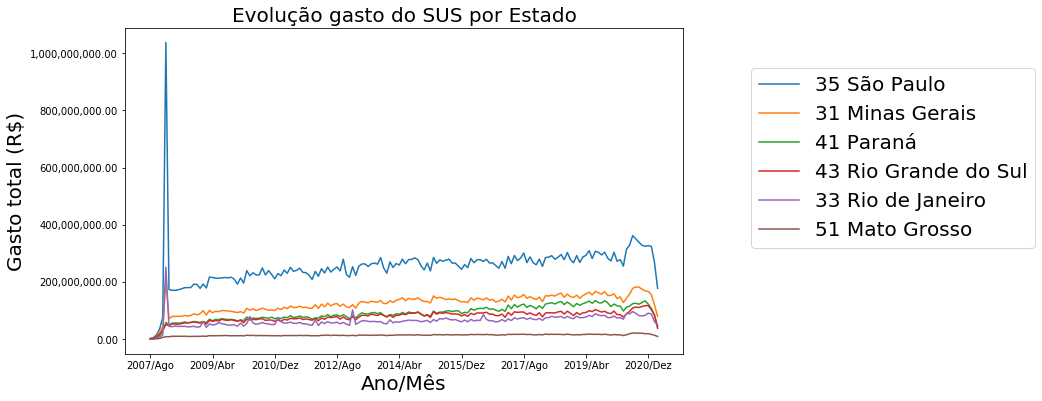

In [57]:
ax = seis_estados.head(6).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

Percebemos um pico perto do valor de 1 bilhão para o estado de São Paulo que acarreta numa escala que complica a identificação das outras linhas e melhor análise dos valores. Vamos retirar o ponto discrepante que está a nos atrapalhar na visualização desses dados.

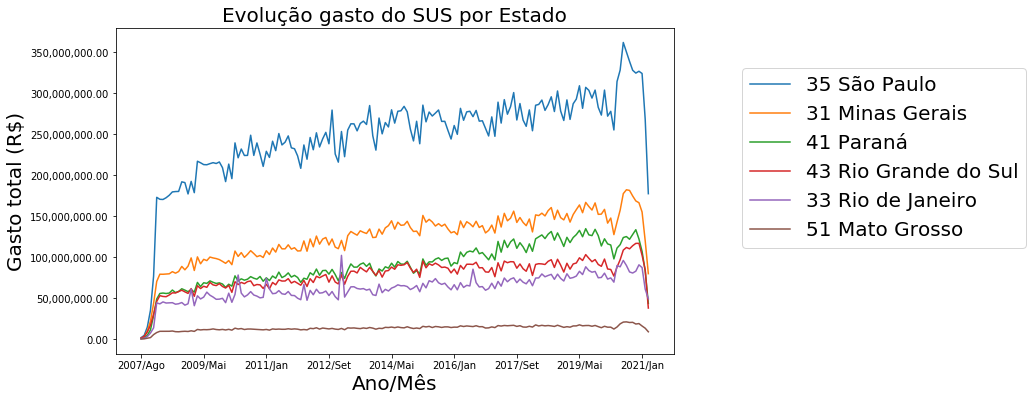

In [58]:
seis_estados = seis_estados.drop('2008/Jan', axis=1)
ax = seis_estados.head(6).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

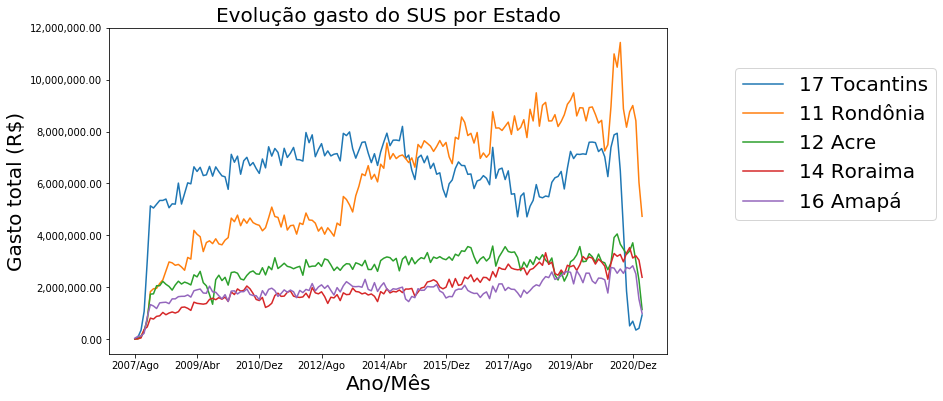

In [61]:
menor_gasto = usaveis.drop('total acumulado', axis=1)
menor_gasto = menor_gasto.drop('Região', axis=1)
ax = menor_gasto.tail(5).T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)

In [69]:
dados_sudeste = usaveis.loc[usaveis['Região'] == 'Sudeste']
dados_sudeste

,Região,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,...,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,total acumulado
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,Sudeste,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1.038067e+09,1.729620e+08,1.705567e+08,1.703382e+08,...,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08,4.138653e+10
31 Minas Gerais,Sudeste,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,2.062081e+08,7.030109e+07,7.911901e+07,7.904632e+07,...,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07,2.041821e+10
33 Rio de Janeiro,Sudeste,469469.34,921646.57,2994664.57,7250528.08,13627123.27,2.515120e+08,4.412816e+07,4.290085e+07,4.530650e+07,...,9.594114e+07,8.979547e+07,8.188669e+07,8.057024e+07,8.280731e+07,9.056735e+07,8.720191e+07,6.087310e+07,4.914988e+07,1.033723e+10
32 Espírito Santo,Sudeste,57408.11,284224.80,1152115.25,2296383.23,5724199.54,1.621211e+07,1.003289e+07,1.226205e+07,1.245347e+07,...,4.193110e+07,3.640526e+07,3.449113e+07,3.480054e+07,3.570873e+07,4.050091e+07,3.376726e+07,2.566961e+07,1.560637e+07,3.405839e+09


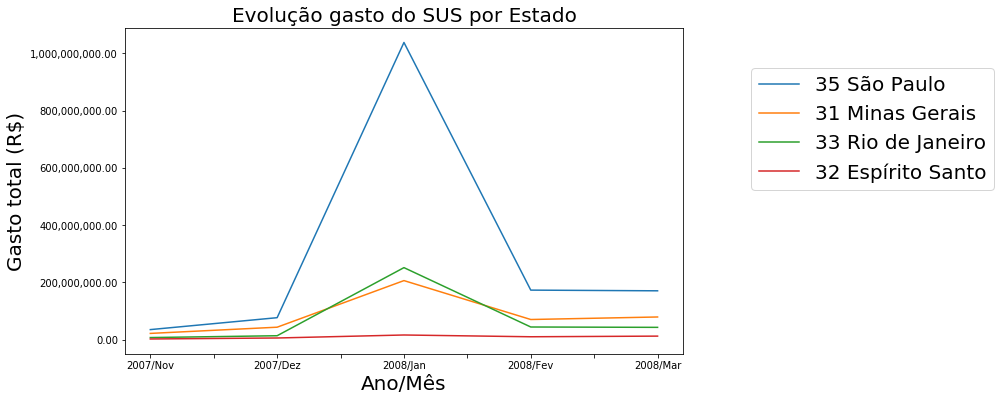

In [79]:
dados_sudeste_plot = dados_sudeste.drop('Região', axis=1)
dados_sudeste_plot = dados_sudeste_plot.drop('total acumulado', axis=1)

sudeste_plot = dados_sudeste_plot.iloc[:, 3:8]

ax = sudeste_plot.T.plot(figsize=(10,6))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.2f}'))
ax.set_xlabel('Ano/Mês', fontsize=20)
ax.set_ylabel('Gasto total (R$)', fontsize=20)
plt.title('Evolução gasto do SUS por Estado', fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=2, fontsize=20)